In [1]:
from fastai.vision.all import *
import fastai
import timm
import albumentations as A

# In[2]:


import torch
torch.cuda.set_device(0)

In [2]:
model_name = 'resnetrs50.tf_in1k'

In [3]:
dfNew = pd.read_csv('multi-label-annotation.csv')

In [4]:
dfNew=dfNew[dfNew.tags!='NRG']

In [5]:
dfNew

,Eye ID,Final Label,Fellow Eye ID,Age,Label G1,Label G2,Label G3,G1 ANRS,G1 ANRI,G1 RNFLDS,...,G3 RNFLDI,G3 BCLVS,G3 BCLVI,G3 NVT,G3 DH,G3 LD,G3 LC,path,label,tags
0,TRAIN077394,RG,TRAIN030625,50.0,RG,NRG,RG,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train/TRAIN077394.JPG,training,ANRS RNFLDS
1,TRAIN087547,RG,NaN,73.0,RG,NaN,RG,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,train/TRAIN087547.JPG,training,ANRS NVT LD
2,TRAIN099349,RG,TRAIN067571,66.0,RG,RG,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train/TRAIN099349.JPG,training,ANRS ANRI
3,TRAIN059527,RG,TRAIN068276,56.0,RG,RG,NaN,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train/TRAIN059527.JPG,training,ANRS
4,TRAIN051345,RG,TRAIN055645,28.0,RG,RG,NaN,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train/TRAIN051345.JPG,training,ANRI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4083,TRAIN008325,RG,TRAIN101912,52.0,RG,RG,NaN,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train/TRAIN008325.JPG,valid,RNFLDS RNFLDI
4084,TRAIN064395,RG,TRAIN044112,54.0,RG,RG,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train/TRAIN064395.JPG,valid,NVT
4085,TRAIN092156,RG,NaN,40.0,RG,RG,NaN,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train/TRAIN092156.JPG,valid,ANRI
4086,TRAIN035231,RG,NaN,68.0,RG,RG,NaN,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train/TRAIN035231.JPG,valid,ANRI


In [6]:
dfNew[dfNew.label!='valid']

,Eye ID,Final Label,Fellow Eye ID,Age,Label G1,Label G2,Label G3,G1 ANRS,G1 ANRI,G1 RNFLDS,...,G3 RNFLDI,G3 BCLVS,G3 BCLVI,G3 NVT,G3 DH,G3 LD,G3 LC,path,label,tags
0,TRAIN077394,RG,TRAIN030625,50.0,RG,NRG,RG,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train/TRAIN077394.JPG,training,ANRS RNFLDS
1,TRAIN087547,RG,NaN,73.0,RG,NaN,RG,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,train/TRAIN087547.JPG,training,ANRS NVT LD
2,TRAIN099349,RG,TRAIN067571,66.0,RG,RG,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train/TRAIN099349.JPG,training,ANRS ANRI
3,TRAIN059527,RG,TRAIN068276,56.0,RG,RG,NaN,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train/TRAIN059527.JPG,training,ANRS
4,TRAIN051345,RG,TRAIN055645,28.0,RG,RG,NaN,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train/TRAIN051345.JPG,training,ANRI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4063,TRAIN034197,RG,TRAIN000403,76.0,RG,RG,NaN,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train/TRAIN034197.JPG,training,ANRS RNFLDS RNFLDI
4064,TRAIN042907,RG,TRAIN004786,37.0,RG,RG,NaN,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train/TRAIN042907.JPG,training,ANRI RNFLDI NVT LC
4065,TRAIN057690,RG,TRAIN092951,65.0,RG,RG,NaN,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train/TRAIN057690.JPG,training,ANRI BCLVI
4066,TRAIN053521,RG,NaN,63.0,RG,RG,NaN,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train/TRAIN053521.JPG,training,ANRI NVT LD LC


In [7]:
def is_valid(path):
    name = path[0]
    return (dfNew[dfNew['Eye ID']==name])['label'].values[0]=='valid'


db = DataBlock(blocks = (ImageBlock, MultiCategoryBlock),
             splitter=FuncSplitter(is_valid),
             get_x = ColReader(-3),
             get_y=ColReader(-1,label_delim=' '),
             item_tfms = [Resize(384)], # CropPad(200,200)
             batch_tfms=[*aug_transforms(size=384, min_scale=0.75,do_flip=True,flip_vert=True,
                  max_rotate=2.,max_zoom=1.1, max_warp=0.05,p_affine=0.9, p_lighting=0.8), 
                         Normalize.from_stats(*imagenet_stats)])


In [8]:
dls = db.dataloaders(dfNew.values,bs=8)

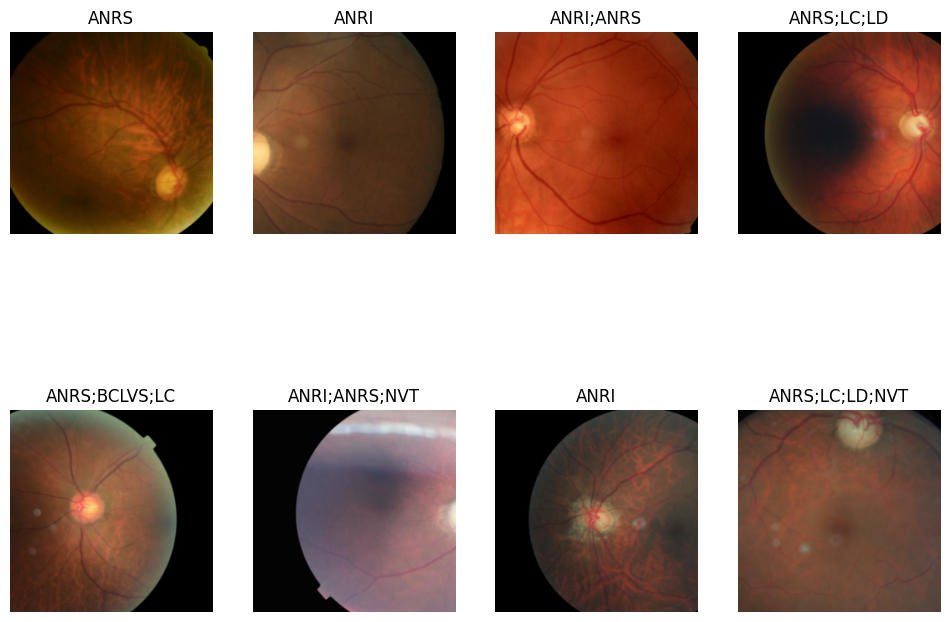

In [9]:
dls.show_batch(max_n=9, figsize=(12,9))

In [10]:
from fastai.vision.all import *
callbacks = [
    ShowGraphCallback(),
    #EarlyStoppingCallback(patience=5),
    SaveModelCallback(fname=model_name+"_multilabel",monitor='accuracy_multi'),
    ReduceLROnPlateau(patience=2), 
    #ProgressiveResizingRandAugment([0,100,200,300,350],[224,384,512,640,640],[128,224,384,512,512],[0,2,4,6,8],128,'resnetrsUpretina')
]


In [11]:
learn = vision_learner(dls,model_name,metrics=[accuracy_multi],cbs=callbacks).to_fp16()

In [12]:
# learn.lr_find()

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.546566,0.454186,0.808313,00:48


Better model found at epoch 0 with accuracy_multi value: 0.8083131313323975.


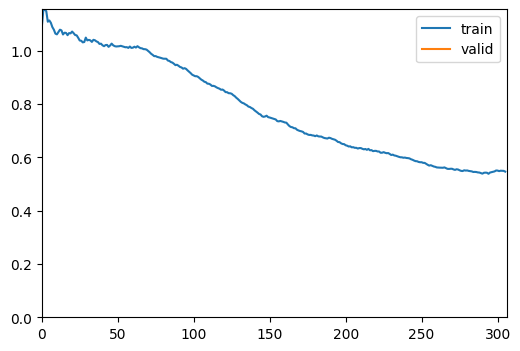

In [13]:
learn.fit_one_cycle(1, slice(2e-3))

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(30, slice(6e-3/2.6**4, 6e-3))

epoch,train_loss,valid_loss,accuracy_multi,time


In [ ]:
learn.export(model_name+"_multilabel"+'.pkl')